<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/wrapper_methods_feat_select__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset= load_iris()
df= pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target']= dataset.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


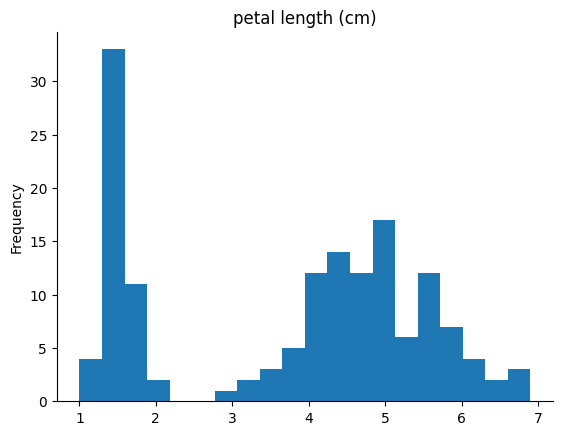

In [3]:
# @title petal length (cm)

from matplotlib import pyplot as plt
df['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
df["target"].unique()

array([0, 1, 2])

In [5]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
sel= EFS(logreg, min_features=1, max_features=3, scoring='accuracy')
sel.fit(df.drop('target', axis=1), df['target'])

Features: 14/14

ExhaustiveFeatureSelector(estimator=LogisticRegression(),
                          feature_groups=[[0], [1], [2], [3]], max_features=3)

In [6]:
sel.best_score_

0.9666666666666668

In [7]:
sel.best_feature_names_

('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')

In [8]:
subset= pd.DataFrame.from_dict(sel.subsets_)
subset.T[["feature_idx", "avg_score", 'feature_names']]

,feature_idx,avg_score,feature_names
0,"(0,)",0.753333,"(sepal length (cm),)"
1,"(1,)",0.566667,"(sepal width (cm),)"
2,"(2,)",0.953333,"(petal length (cm),)"
3,"(3,)",0.96,"(petal width (cm),)"
4,"(0, 1)",0.813333,"(sepal length (cm), sepal width (cm))"
5,"(0, 2)",0.953333,"(sepal length (cm), petal length (cm))"
6,"(0, 3)",0.953333,"(sepal length (cm), petal width (cm))"
7,"(1, 2)",0.953333,"(sepal width (cm), petal length (cm))"
8,"(1, 3)",0.94,"(sepal width (cm), petal width (cm))"
9,"(2, 3)",0.96,"(petal length (cm), petal width (cm))"


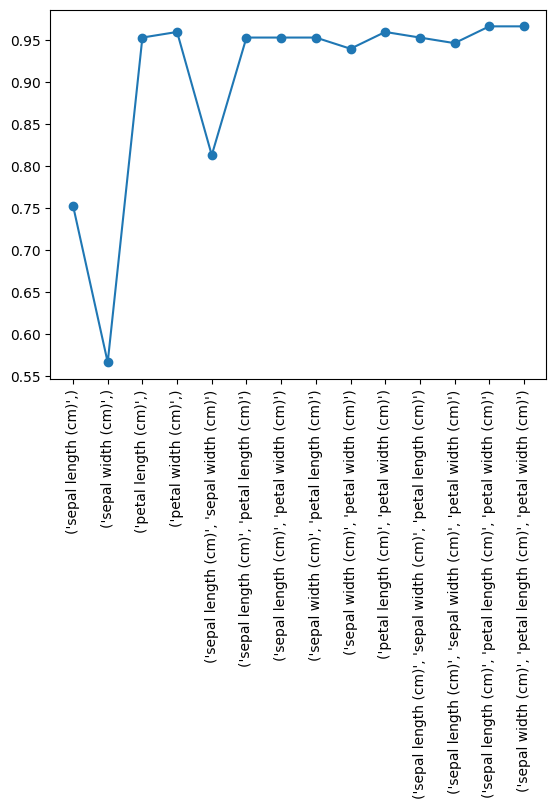

In [9]:
plt.plot([str(k) for k in subset.T.feature_names], subset.T.avg_score, marker='o')
plt.xticks(rotation=90)
plt.show()

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')


In [11]:
columns=[["Crime_rate", "res_ar/25ksqft", "indstrl_ar/acre", "Charls_rvr", "NOx_pp10m", "rooms/dwell", "age", "Emp_eX_wt_dist", "Highway_access", "prop_tax/$10k", "pup/teach", "blcks", "lower_stat_peep", "med_val"]]

In [12]:
df= pd.DataFrame(data= df.values, columns=columns)
df

,Crime_rate,res_ar/25ksqft,indstrl_ar/acre,Charls_rvr,NOx_pp10m,rooms/dwell,age,Emp_eX_wt_dist,Highway_access,prop_tax/$10k,pup/teach,blcks,lower_stat_peep,med_val
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
df.items

<bound method DataFrame.items of     Crime_rate res_ar/25ksqft indstrl_ar/acre Charls_rvr NOx_pp10m  \
0      0.00632           18.0            2.31        0.0     0.538   
1      0.02731            0.0            7.07        0.0     0.469   
2      0.02729            0.0            7.07        0.0     0.469   
3      0.03237            0.0            2.18        0.0     0.458   
4      0.06905            0.0            2.18        0.0     0.458   
..         ...            ...             ...        ...       ...   
501    0.06263            0.0           11.93        0.0     0.573   
502    0.04527            0.0           11.93        0.0     0.573   
503    0.06076            0.0           11.93        0.0     0.573   
504    0.10959            0.0           11.93        0.0     0.573   
505    0.04741            0.0           11.93        0.0     0.573   

    rooms/dwell   age Emp_eX_wt_dist Highway_access prop_tax/$10k pup/teach  \
0         6.575  65.2         4.0900            1.0         296.0      15.3   
1         6.421  78.9         4.9671            2.0         242.0      17.8   
2         7.185  61.1         4.9671            2.0         242.0      17.8   
3         6.998  45.8         6.0622            3.0         222.0      18.7   
4         7.147  54.2         6.0622            3.0         222.0      18.7   
..          ...   ...            ...            ...           ...       ...   
501       6.593  69.1         2.4786            1.0         273.0      21.0   
502       6.120  76.7         2.2875            1.0         273.0      21.0   
503       6.976  91.0         2.1675            1.0         273.0      21.0   
504       6.794  89.3         2.3889            1.0         273.0      21.0   
505       6.030  80.8         2.5050            1.0         273.0      21.0   

      blcks lower_stat_peep med_val  
0    396.90            4.98    24.0  
1    396.90            9.14    21.6  
2    392.83            4.03    34.7  
3    394.63            2.94    33.4  
4    396.90            5.33    36.2  
..      ...             ...     ...  
501  391.99            9.67    22.4  
502  396.90            9.08    20.6  
503  396.90            5.64    23.9  
504  393.45            6.48    22.0  
505  396.90            7.88    11.9  

[506 rows x 14 columns]>

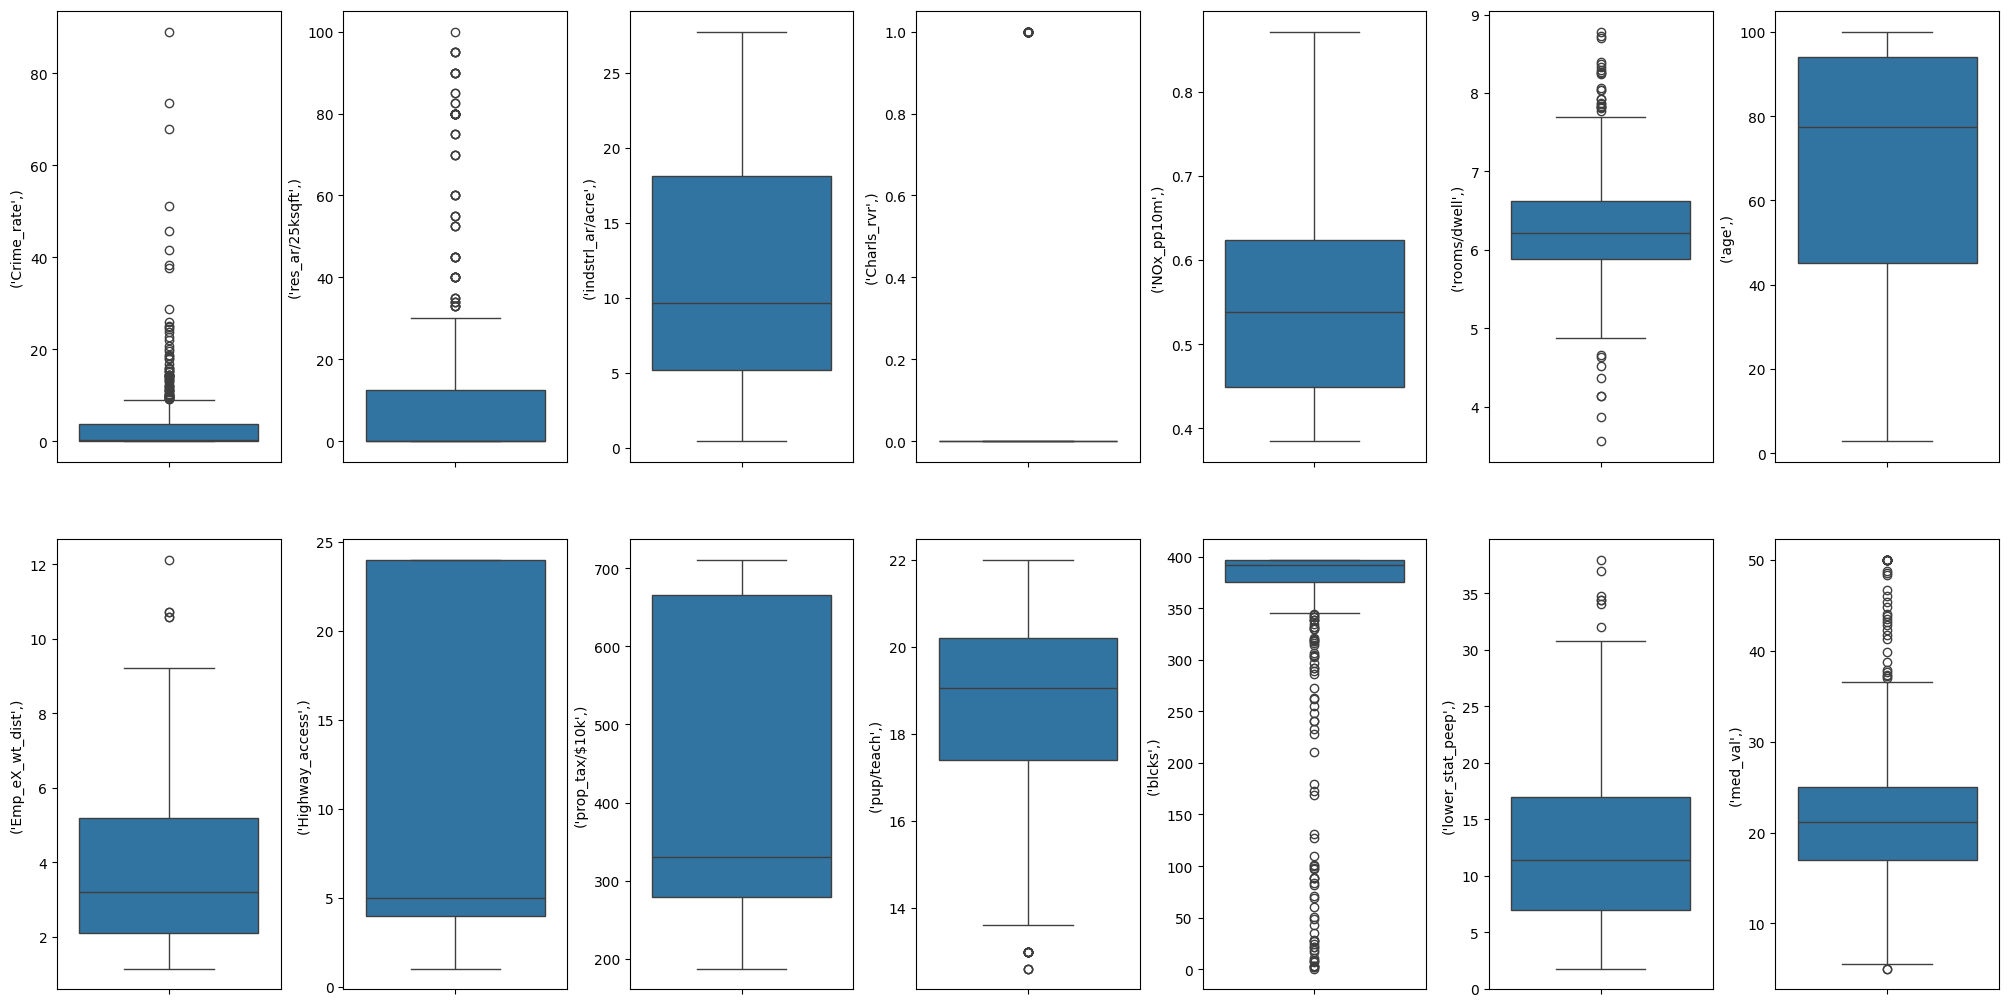

In [14]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for key,value in df.items():
    sns.boxplot(y=key, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [15]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

n_cols = 7
n_rows = 2

# Create the subplots
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=str(df.columns))

# Flatten the axs for easy iteration
index = 0
for i, (key, value) in enumerate(df.items()):
    row = index // n_cols + 1
    col = index % n_cols + 1
    fig.add_trace(
        go.Box(y=value, name=str(key)),
        row=row, col=col
    )
    index += 1

# Update the layout for better appearance
fig.update_layout(
    height=800, width=1400,
    showlegend=False,
    title_text="Boxplots of Multiple Columns"
)

# Show the plot
fig.show()

In [16]:
type(df.items())

generator

In [46]:
a= df['Crime_rate'].quantile(0.25)
b= df['Crime_rate'].quantile(0.75)
iqr= b-a
lower_bound= a-1.5*iqr
upper_bound= b+1.5*iqr
o= df['Crime_rate'][(df['Crime_rate'] < lower_bound) | (df['Crime_rate'] > upper_bound)]
p= 1- (o.isna().sum()/ df.shape[0])
print(p*100)

Crime_rate    13.043478
dtype: float64


In [17]:
for key,value in df.items():
    q1= value.quantile(0.25)
    q3= value.quantile(0.75)
    iqr= q3-q1
    lower_bound= q1-1.5*iqr
    upper_bound= q3+1.5*iqr
    values_col= value[(value < lower_bound) | (value > upper_bound)]
    perc= np.shape(values_col)[0]*100.0/np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (key, perc))

Column ('Crime_rate',) outliers = 13.04%
Column ('res_ar/25ksqft',) outliers = 13.44%
Column ('indstrl_ar/acre',) outliers = 0.00%
Column ('Charls_rvr',) outliers = 6.92%
Column ('NOx_pp10m',) outliers = 0.00%
Column ('rooms/dwell',) outliers = 5.93%
Column ('age',) outliers = 0.00%
Column ('Emp_eX_wt_dist',) outliers = 0.99%
Column ('Highway_access',) outliers = 0.00%
Column ('prop_tax/$10k',) outliers = 0.00%
Column ('pup/teach',) outliers = 2.96%
Column ('blcks',) outliers = 15.22%
Column ('lower_stat_peep',) outliers = 1.38%
Column ('med_val',) outliers = 7.91%


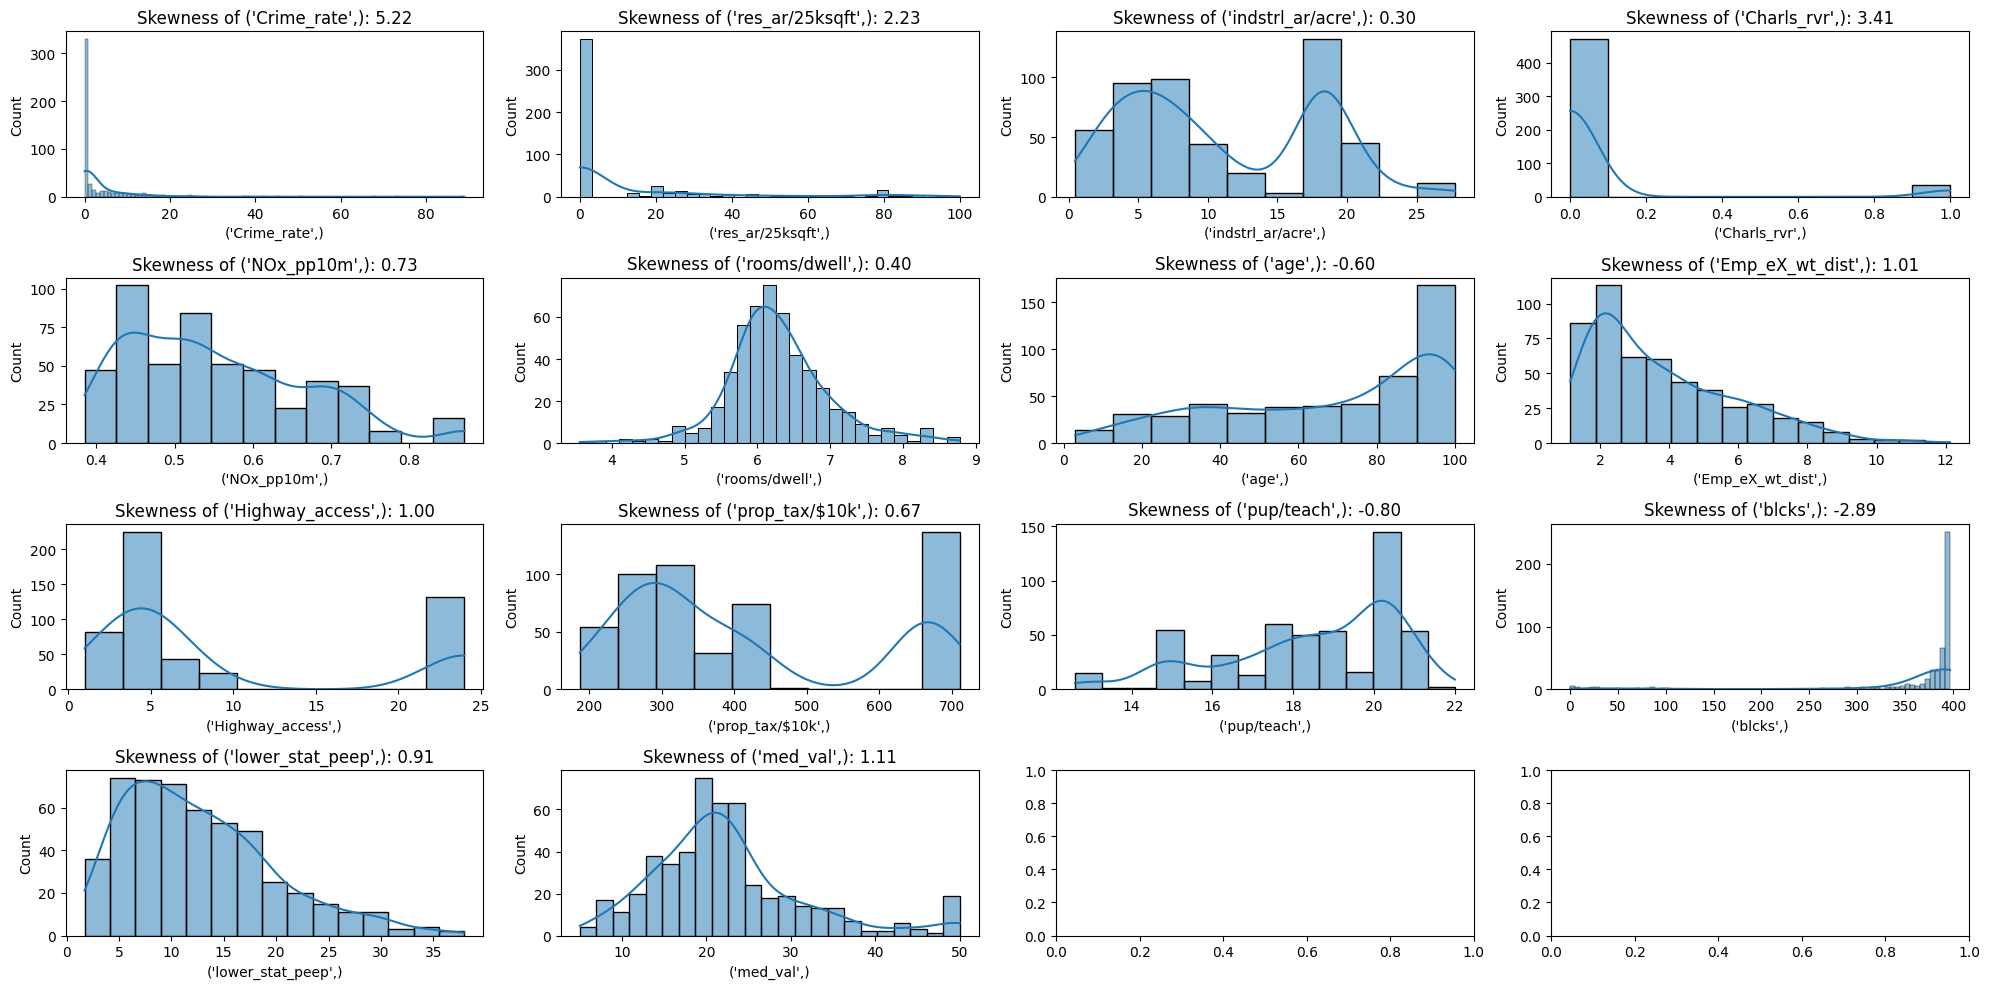

In [18]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

# Plot each column's histogram with KDE and skewness annotation
for index, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axs[index])  # Use specific subplot axis
    axs[index].set_title(f'Skewness of {column}: {df[column].skew():.2f}')

# Adjust layout and show the plot
plt.tight_layout()
# Display the plots
plt.show()

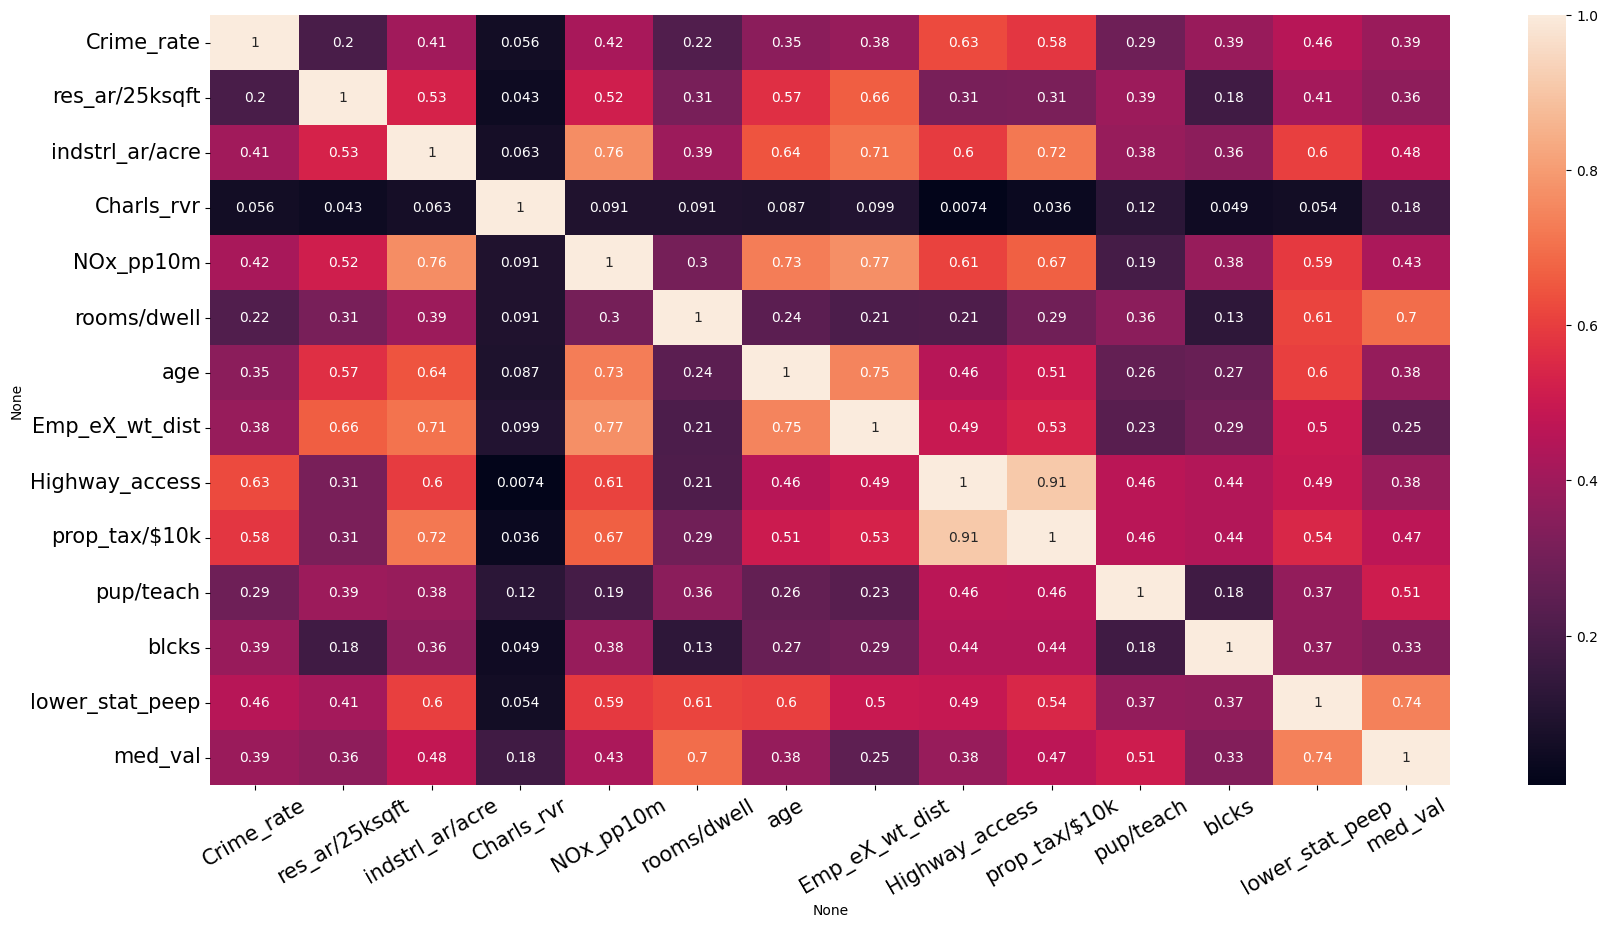

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(), annot=True)
plt.xticks(fontsize=15, rotation= 30)
plt.yticks(fontsize=15)
plt.show()

In [20]:
corr_matrix = df.corr().abs()
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] <0.5:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

columns_to_drop = set(columns_to_drop)

print(columns_to_drop)
len(columns_to_drop)

64
{('med_val',), ('NOx_pp10m',), ('pup/teach',), ('age',), ('Highway_access',), ('rooms/dwell',), ('lower_stat_peep',), ('Charls_rvr',), ('Emp_eX_wt_dist',), ('indstrl_ar/acre',), ('prop_tax/$10k',), ('res_ar/25ksqft',), ('blcks',)}


13

highway  accessibility is proportional to property tax

In [47]:
X= df.drop('med_val', axis=1)
Y= df['med_val']


<ipython-input-47-47a2e8ba893a>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [48]:
#y=np.log1p(y)
for col in X.columns:
  if X[col].skew() > 0.4:
    X[col]= np.log1p(X[col])

In [49]:
X.describe()

,Crime_rate,res_ar/25ksqft,indstrl_ar/acre,Charls_rvr,NOx_pp10m,rooms/dwell,age,Emp_eX_wt_dist,Highway_access,prop_tax/$10k,pup/teach,blcks,lower_stat_peep
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.813418,0.953873,11.136779,0.047945,0.438587,1.981139,68.574901,1.479648,2.054483,5.934259,18.455534,356.674032,2.475610
std,1.022731,1.620831,6.860353,0.176055,0.072948,0.096500,28.148861,0.413390,0.751839,0.395337,2.164946,91.294864,0.539033
min,0.006300,0.000000,0.460000,0.000000,0.325700,1.517542,2.900000,0.755934,0.693147,5.236442,12.600000,0.320000,1.004302
25%,0.078853,0.000000,5.190000,0.000000,0.370874,1.929418,45.025000,1.131459,1.609438,5.634790,17.400000,375.377500,2.073162
50%,0.228336,0.000000,9.690000,0.000000,0.430483,1.975261,77.500000,1.436855,1.791759,5.802118,19.050000,391.440000,2.514464
75%,1.542674,2.602690,18.100000,0.000000,0.484892,2.031236,94.075000,1.822659,3.218876,6.502790,20.200000,396.225000,2.887869
max,4.499545,4.615121,27.740000,0.693147,0.626473,2.280339,100.000000,2.574633,3.218876,6.568078,22.000000,396.900000,3.662792


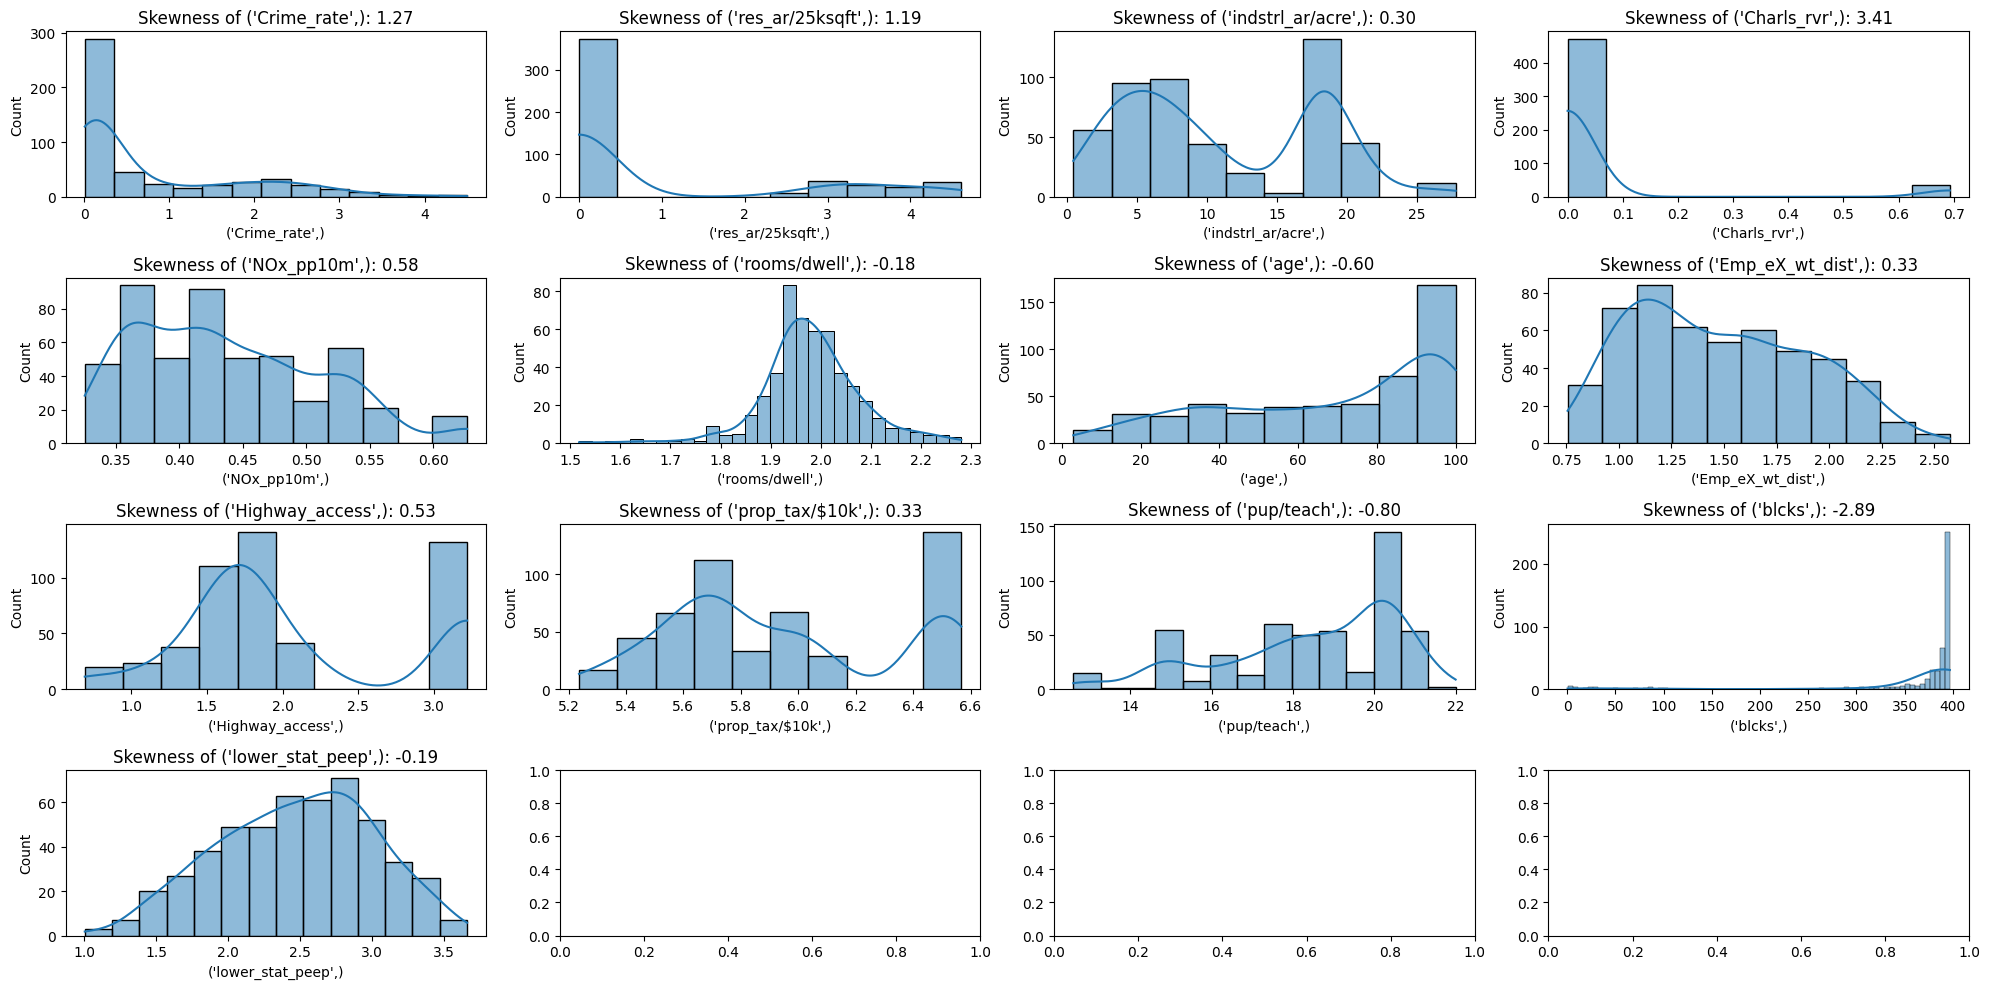

In [50]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

# Plot each column's histogram with KDE and skewness annotation
for index, column in enumerate(X.columns):
    sns.histplot(X[column], kde=True, ax=axs[index])  # Use specific subplot axis
    axs[index].set_title(f'Skewness of {column}: {X[column].skew():.2f}')

# Adjust layout and show the plot
plt.tight_layout()
# Display the plots
plt.show()

In [25]:
col_used_X= ['indstrl_ar/acre','NOx_pp10m','rooms/dwell','age','Emp_eX_wt_dist','Highway_access', 'prop_tax/$10k', 'pup/teach', 'lower_stat_peep']

In [26]:
x= X[col_used_X]
x.shape
Y.shape

(506, 1)

In [27]:
from os import X_OK
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test= train_test_split(x, Y, test_size=0.2, random_state=42)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
trf1= ColumnTransformer([
    ('minmax',MinMaxScaler(),  x.columns)
])
trf2= LinearRegression()

pipeline = Pipeline([
    ('preprocessing', trf1),
    ('model', trf2)
])

# Fit the pipeline on your data
pipeline.fit(X_train, Y_train)

# Predict using the pipeline
predictions = pipeline.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 18.596678862569807
R-squared: 0.7464104801205526


In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
model =make_pipeline(PolynomialFeatures(degree=2), Ridge())
model.fit(X_train, Y_train)
y_pred= model.predict(X_test)
print(mean_squared_error(Y_test, y_pred))
print(r2_score(Y_test, y_pred))

12.473403280586458
0.8299091804207483


In [71]:
model2= make_pipeline(MinMaxScaler(), SVR())
model2.fit(X_train, Y_train)
y_pred= model2.predict(X_test)
print(mean_squared_error(Y_test, y_pred))
print(r2_score(Y_test, y_pred))
print(cross_val_score(model2, X_train, Y_train, cv=5).mean())

23.63111352140931
0.6777595195143995
0.6445026782182592


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183

In [70]:
from sklearn.tree import DecisionTreeRegressor
model3= make_pipeline(MinMaxScaler(), DecisionTreeRegressor())
model3.fit(X_train, Y_train)
y_pred= model3.predict(X_test)
print(mean_squared_error(Y_test, y_pred))
print(r2_score(Y_test, y_pred))
print(cross_val_score(model3, X_train, Y_train, cv=5).mean())

17.00392156862745
0.7681297645390348
0.649342655741372


In [110]:
from sklearn.ensemble import GradientBoostingRegressor
model4= make_pipeline(MinMaxScaler(), GradientBoostingRegressor())
model4.fit(X_train, Y_train)
y_pred= model4.predict(X_test)
print(mean_squared_error(Y_test, y_pred))
print(r2_score(Y_test, y_pred))
print(cross_val_score(model4, X_train, Y_train, cv=5).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



6.100730178174414
0.9168087351386612


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.8418851599557874


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



some feat_selection _wrapper

In [79]:
from sklearn.feature_selection import RFECV, RFE, SelectKBest, f_regression
rfe= RFECV(estimator=LinearRegression(), step=1, cv=5 , scoring='neg_mean_squared_error')
rfe.fit(X_train, Y_train)

RFECV(cv=5, estimator=LinearRegression(), scoring='neg_mean_squared_error')

In [82]:
X_train

,indstrl_ar/acre,NOx_pp10m,rooms/dwell,age,Emp_eX_wt_dist,Highway_access,prop_tax/$10k,pup/teach,lower_stat_peep
477,18.10,0.478716,1.841184,97.3,1.131628,3.218876,6.502790,20.2,3.254629
15,8.14,0.430483,1.921910,56.5,1.704494,1.609438,5.730100,21.0,2.248129
332,6.06,0.363184,1.950329,23.3,2.033489,0.693147,5.720312,16.9,2.178155
423,18.10,0.478716,1.960517,85.1,1.105853,3.218876,6.502790,20.2,3.190065
19,8.14,0.430483,1.906129,69.5,1.567886,1.609438,5.730100,21.0,2.507972
...,...,...,...,...,...,...,...,...,...
106,8.56,0.418710,1.922203,91.9,1.166582,1.791759,5.953243,20.9,2.978586
270,6.96,0.381172,1.925124,42.1,1.691755,1.386294,5.411646,18.6,2.639057
348,2.01,0.361165,2.032743,29.7,2.234734,1.609438,5.638355,17.0,1.944481
435,18.10,0.553885,2.031957,94.6,1.139338,3.218876,6.502790,20.2,3.189241


In [98]:
lr = LinearRegression()

efs = EFS(lr, max_features=9, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = efs.fit(X_train, Y_train)

Features: 511/511

In [99]:
sel.best_score_

0.7435443151186368

In [100]:
sel.best_feature_names_

(('NOx_pp10m',),
 ('rooms/dwell',),
 ('Emp_eX_wt_dist',),
 ('Highway_access',),
 ('prop_tax/$10k',),
 ('pup/teach',),
 ('lower_stat_peep',))

In [108]:
best_feature_indices = efs.best_idx_

# Get the names of the selected features
selected_feature_names = X_train.columns[list(best_feature_indices)]

# Create a new DataFrame with only the selected features
new_df_x_train = X_train[selected_feature_names]
new_df_x_test = X_test[selected_feature_names]
# Output the selected feature names and new DataFrame
print("Selected features:", selected_feature_names)
print("New DataFrame with selected features:")
print(new_df_x_train.head())


Selected features: MultiIndex([(      'NOx_pp10m',),
            (    'rooms/dwell',),
            ( 'Emp_eX_wt_dist',),
            ( 'Highway_access',),
            (  'prop_tax/$10k',),
            (      'pup/teach',),
            ('lower_stat_peep',)],
           )
New DataFrame with selected features:
    NOx_pp10m rooms/dwell Emp_eX_wt_dist Highway_access prop_tax/$10k  \
477  0.478716    1.841184       1.131628       3.218876      6.502790   
15   0.430483    1.921910       1.704494       1.609438      5.730100   
332  0.363184    1.950329       2.033489       0.693147      5.720312   
423  0.478716    1.960517       1.105853       3.218876      6.502790   
19   0.430483    1.906129       1.567886       1.609438      5.730100   

    pup/teach lower_stat_peep  
477      20.2        3.254629  
15       21.0        2.248129  
332      16.9        2.178155  
423      20.2        3.190065  
19       21.0        2.507972  


In [109]:
model4= make_pipeline(MinMaxScaler(), GradientBoostingRegressor())
model4.fit(new_df_x_train, Y_train)
y_pred= model4.predict(new_df_x_test)
print(mean_squared_error(Y_test, y_pred))
print(r2_score(Y_test, y_pred))
print(cross_val_score(model4, new_df_x_train, Y_train, cv=5).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



6.626825636159812
0.9096347501713884


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.8509983457151454


Sequtial backward elimination


In [113]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs= SFS(LinearRegression(), k_features= 'best', forward= True, floating= False)
sfs.fit(X_train, Y_train)


SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 9),
                          scoring='r2')

In [114]:
sfs.k_feature_names_

(('NOx_pp10m',),
 ('rooms/dwell',),
 ('Emp_eX_wt_dist',),
 ('Highway_access',),
 ('prop_tax/$10k',),
 ('pup/teach',),
 ('lower_stat_peep',))

In [115]:
sel.best_feature_names_

(('NOx_pp10m',),
 ('rooms/dwell',),
 ('Emp_eX_wt_dist',),
 ('Highway_access',),
 ('prop_tax/$10k',),
 ('pup/teach',),
 ('lower_stat_peep',))

***using sklearn ***

In [117]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
sfs1= SFS(LinearRegression(), n_features_to_select=5,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)
sfs1.fit(X_train, Y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5,
                          n_jobs=-1, scoring='r2')

In [120]:
X_train.columns[sfs1.support_]

MultiIndex([(      'NOx_pp10m',),
            (    'rooms/dwell',),
            ( 'Emp_eX_wt_dist',),
            (      'pup/teach',),
            ('lower_stat_peep',)],
           )

selectkbest

In [172]:
df
x1=df.drop('med_val', axis=1)
y1=df['med_val']
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.2, random_state=42)

<ipython-input-172-33c2d507096c>:2: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [173]:
x1_train

,Crime_rate,res_ar/25ksqft,indstrl_ar/acre,Charls_rvr,NOx_pp10m,rooms/dwell,age,Emp_eX_wt_dist,Highway_access,prop_tax/$10k,pup/teach,blcks,lower_stat_peep
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [174]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
selector = SelectKBest(score_func=f_regression, k=8)
selector.fit(x1_train , y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SelectKBest(k=8, score_func=<function f_regression at 0x7ef1ac4ce8c0>)

In [175]:
selector.get_support()

array([ True, False,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True])

In [189]:
X_train_selected= pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_train_selected

,indstrl_ar/acre,NOx_pp10m,rooms/dwell,Highway_access,prop_tax/$10k,pup/teach,lower_stat_peep
0,18.10,0.6140,5.304,24.0,666.0,20.2,24.91
1,8.14,0.5380,5.834,4.0,307.0,21.0,8.47
2,6.06,0.4379,6.031,1.0,304.0,16.9,7.83
3,18.10,0.6140,6.103,24.0,666.0,20.2,23.29
4,8.14,0.5380,5.727,4.0,307.0,21.0,11.28
...,...,...,...,...,...,...,...
399,8.56,0.5200,5.836,5.0,384.0,20.9,18.66
400,6.96,0.4640,5.856,3.0,223.0,18.6,13.00
401,2.01,0.4350,6.635,4.0,280.0,17.0,5.99
402,18.10,0.7400,6.629,24.0,666.0,20.2,23.27


In [192]:
mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = x1_train.columns[mask]

selector = SelectKBest(score_func=f_regression, k=7)
selector.fit(x1_train, y1_train)

# Get the boolean mask of selected features
mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = x1_train.columns[mask]

# Transform the data to include only the selected features
X_train_selected = selector.transform(x1_train)
X_test_selected = selector.transform(x1_test)

# Convert to DataFrame with the selected feature names
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_feature_names)

p= LinearRegression()
p.fit(X_train_selected, y1_train)

# Predict and evaluate the model
y_pred = p.predict(X_test_selected)
print("Mean Squared Error:", mean_squared_error(y1_test, y_pred))
print("R-squared Score:", r2_score(y1_test, y_pred))

# Calculate cross-validation score
cv_score = cross_val_score(p, X_train_selected, y1_train, cv=5).mean()
print("Cross-Validation Score (Mean):", cv_score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Squared Error: 25.888811429968406
R-squared Score: 0.6469729186973749
Cross-Validation Score (Mean): 0.6746997059328927


In [158]:
x1_train

MultiIndex([(     'Crime_rate',),
            ('indstrl_ar/acre',),
            (      'NOx_pp10m',),
            (    'rooms/dwell',),
            ( 'Highway_access',),
            (  'prop_tax/$10k',),
            (      'pup/teach',),
            ('lower_stat_peep',)],
           )

In [141]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
selector = SelectKBest(score_func=f_regression, k=7)
selector.fit(X, Y)

mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = X.columns[mask]
# Transform the data to include only the selected features
X_train_selected = selector.transform(X)        #gives aray
# Convert the transformed data back to a DataFrame
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_feature_names)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [142]:
X_train_selected

,Crime_rate,indstrl_ar/acre,NOx_pp10m,rooms/dwell,prop_tax/$10k,pup/teach,lower_stat_peep
0,0.006300,2.31,0.430483,2.024853,5.693732,15.3,1.788421
1,0.026944,7.07,0.384582,2.004314,5.493061,17.8,2.316488
2,0.026924,7.07,0.384582,2.102303,5.493061,17.8,1.615420
3,0.031857,2.18,0.377066,2.079192,5.407172,18.7,1.371181
4,0.066770,2.18,0.377066,2.097650,5.407172,18.7,1.845300
...,...,...,...,...,...,...,...
501,0.060747,11.93,0.452985,2.027227,5.613128,21.0,2.367436
502,0.044275,11.93,0.452985,1.962908,5.613128,21.0,2.310553
503,0.058986,11.93,0.452985,2.076437,5.613128,21.0,1.893112
504,0.103991,11.93,0.452985,2.053354,5.613128,21.0,2.012233
